<a href="https://colab.research.google.com/github/muhsinzubair/Data-Science-Projects/blob/main/YuluCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yulu Case Study

**Business Problem:**

*  Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
*  How well those variables describe the electric cycle demands

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089 -O yulu.csv

--2023-09-06 15:41:38--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.35.37.159, 13.35.37.102, 13.35.37.7, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.35.37.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘yulu.csv’

yulu.csv            100%[===================>] 633.16K  --.-KB/s    in 0.02s   

2023-09-06 15:41:38 (31.8 MB/s) - ‘yulu.csv’ saved [648353/648353]



In [ ]:
df = pd.read_csv('yulu.csv')

**Rows and Columns in data:**

In [ ]:
df.shape

(10886, 12)

**Preview of data:**

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Basic info of Data(data types, missing values, columns):**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**Columns Description:**

**datetime:** datetime

**season:** season (1: spring, 2: summer, 3: fall, 4: winter)

**holiday:** whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

**workingday:** if day is neither weekend nor holiday is 1, otherwise is 0.

**weather:**

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**temp:** temperature in Celsius

**atemp:** feeling temperature in Celsius

**humidity:** humidity

**windspeed:** wind speed

**casual:** count of casual users

**registered:** count of registered users

**count:** count of total rental bikes including both casual and registered

# Plots and Graphs

**Plotting 'count' column:**

<Axes: xlabel='count', ylabel='Count'>

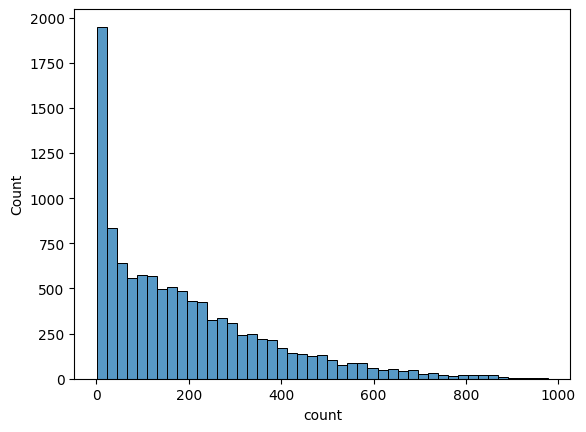

In [ ]:
sns.histplot(data=df,x='count')

**Plotting 'temp' column:**

<Axes: xlabel='temp', ylabel='Count'>

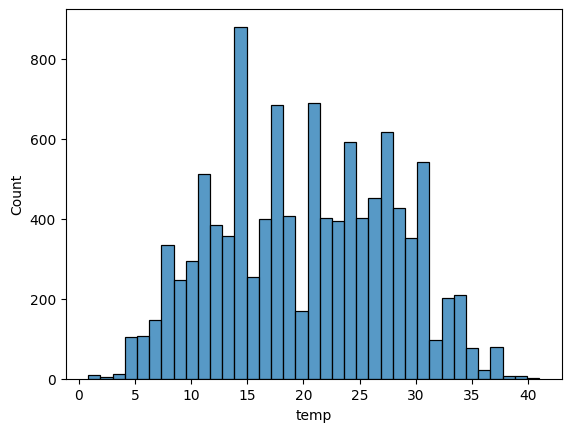

In [ ]:
sns.histplot(data=df,x='temp')

**Plotting 'atemp' column:**

<Axes: xlabel='atemp', ylabel='Count'>

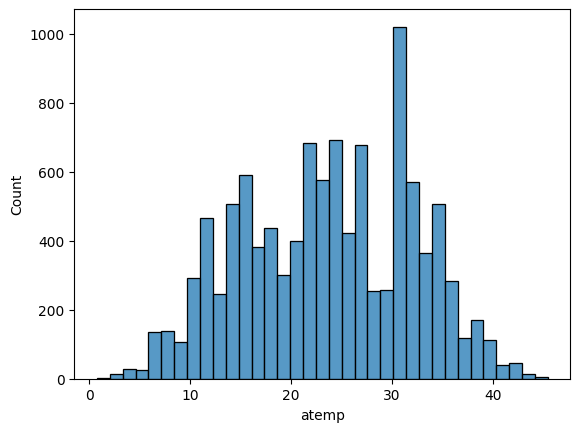

In [ ]:
sns.histplot(data=df,x='atemp')

**Plotting 'humidity' column:**

<Axes: xlabel='humidity', ylabel='Count'>

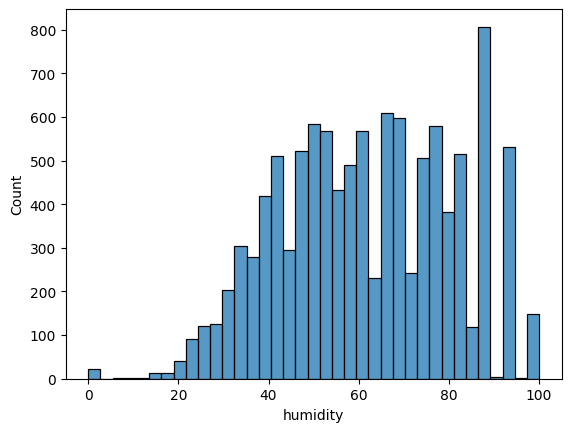

In [ ]:
sns.histplot(data=df,x='humidity')

**Plotting 'casual'/'registered' column:**

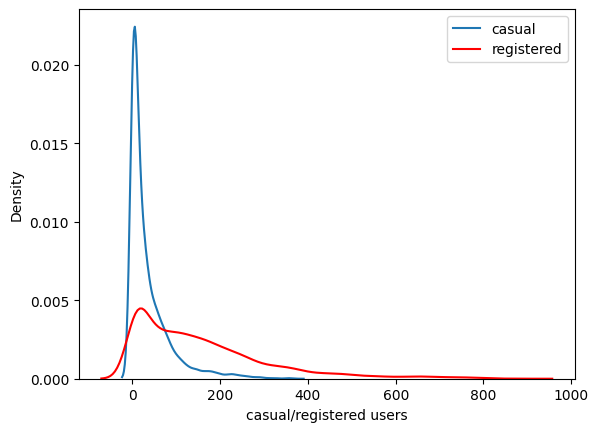

In [ ]:
sns.kdeplot(df['casual'],label='casual')
sns.kdeplot(df['registered'],color='red',label='registered')
plt.xlabel('casual/registered users')
plt.legend()

**Plotting 'windspeed' column:**

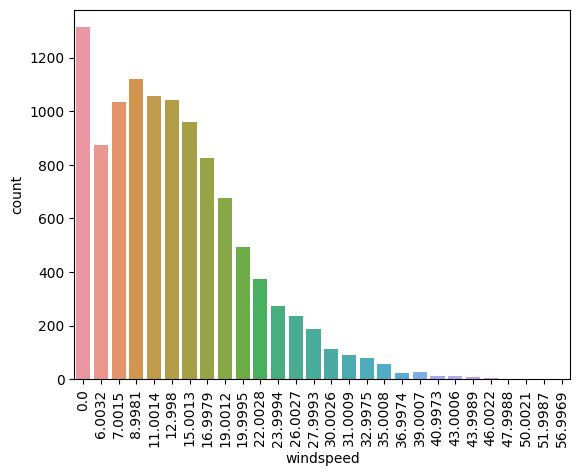

In [ ]:
sns.countplot(data=df,x='windspeed')
plt.xticks(rotation=90)
plt.show()

**Plotting 'season' column:**

<Axes: xlabel='season', ylabel='count'>

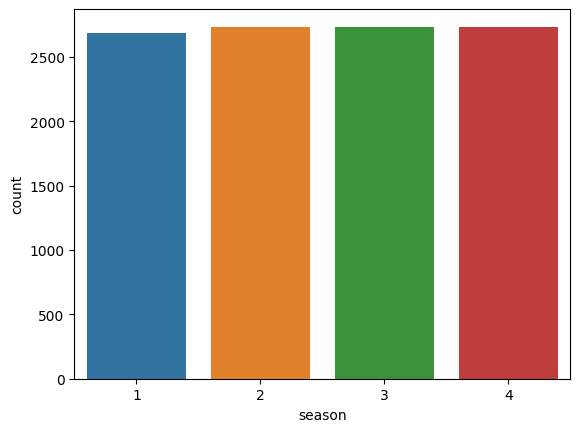

In [ ]:
sns.countplot(data=df,x='season')

**season/count:**

<Axes: xlabel='count', ylabel='Density'>

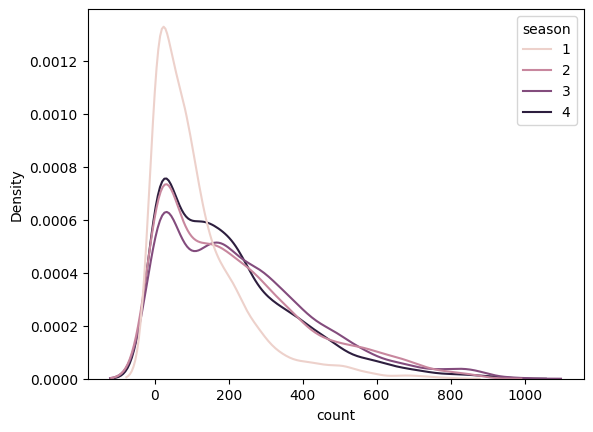

In [ ]:
sns.kdeplot(data=df,x='count',hue='season')

<Axes: title={'center': 'count'}, xlabel='season'>

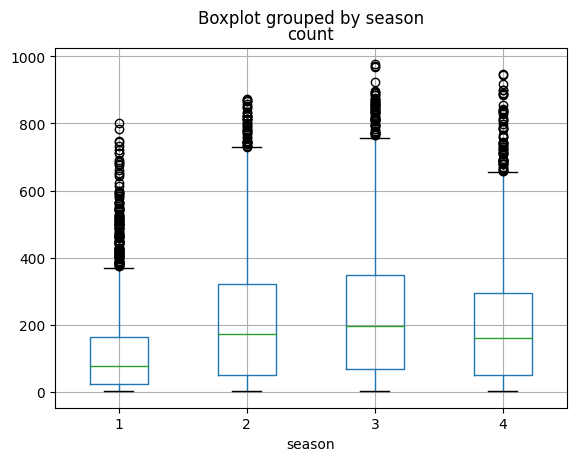

In [ ]:
df.boxplot(column='count',by='season')

**Plotting 'weather' column:**

In [ ]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

<Axes: xlabel='weather', ylabel='count'>

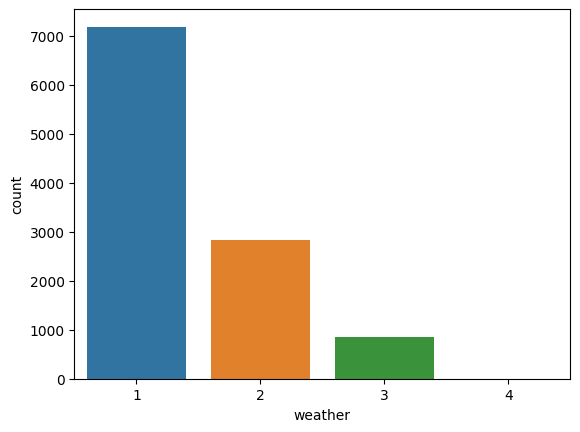

In [ ]:
sns.countplot(data=df,x='weather')

**weather/count:**

<ipython-input-18-914dac695f07>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df,x='count',hue='weather')


<Axes: xlabel='count', ylabel='Density'>

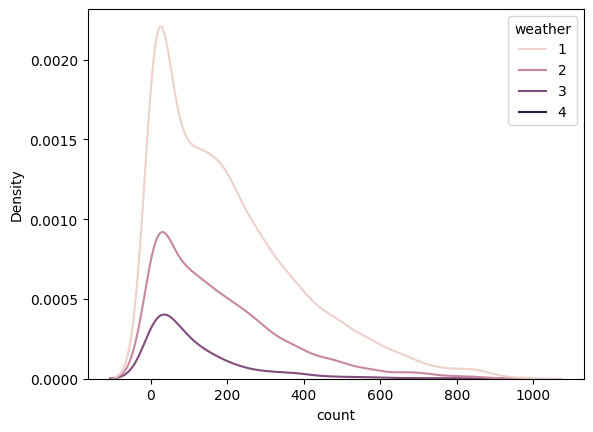

In [ ]:
sns.kdeplot(data=df,x='count',hue='weather')

<Axes: xlabel='weather', ylabel='count'>

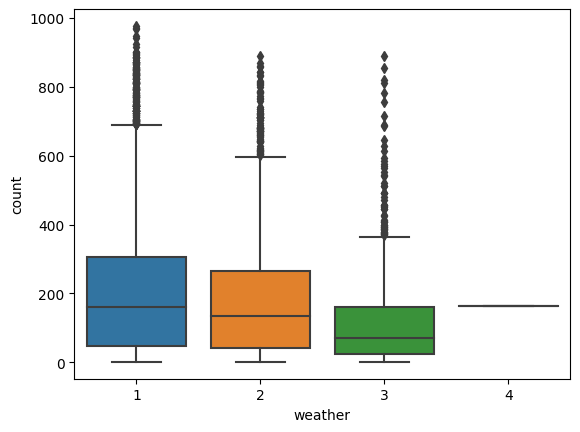

In [ ]:
sns.boxplot(data=df,x='weather',y='count')

**Plotting 'workingday' column:**

<Axes: xlabel='workingday', ylabel='count'>

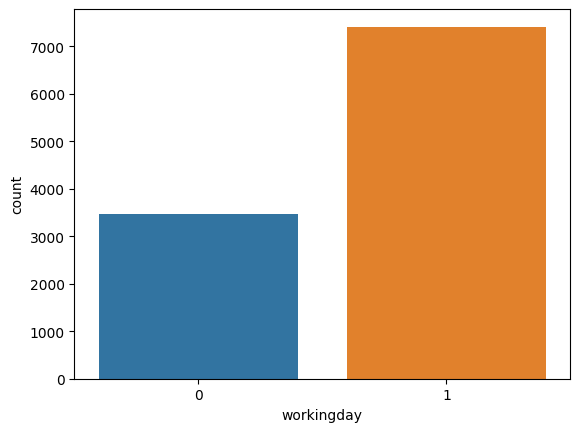

In [ ]:
sns.countplot(data=df,x='workingday')

**workingday/count:**

<Axes: xlabel='workingday', ylabel='count'>

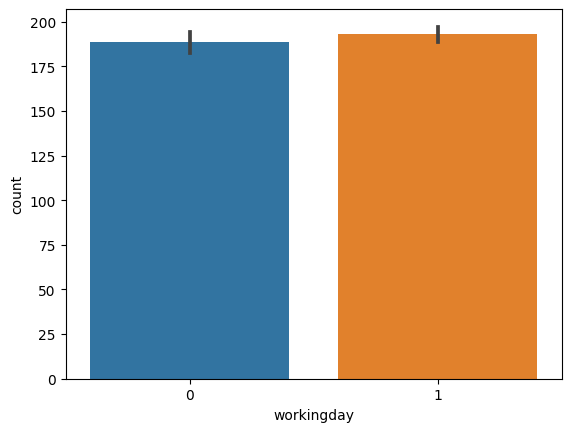

In [ ]:
sns.barplot(data=df,x='workingday',y='count')

<Axes: xlabel='workingday', ylabel='count'>

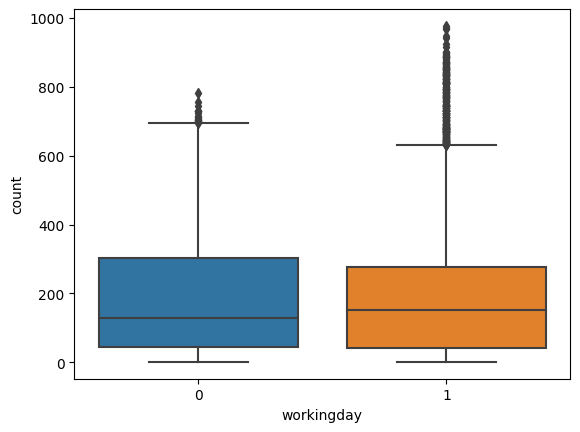

In [ ]:
sns.boxplot(data=df,x='workingday',y='count')

**Plotting 'holiday' column:**

<Axes: xlabel='holiday', ylabel='count'>

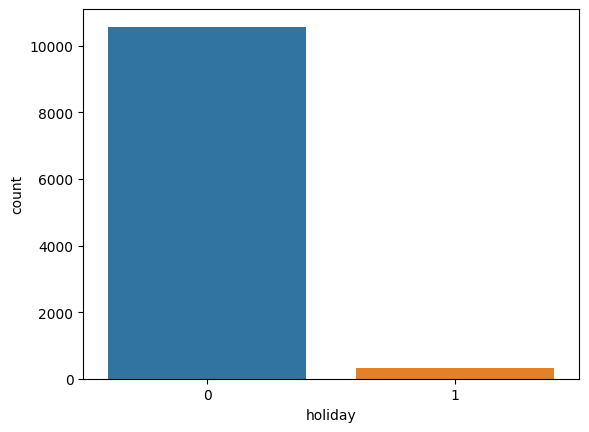

In [ ]:
sns.countplot(data=df,x='holiday')

**windspeed/count:**

<Axes: xlabel='count', ylabel='windspeed'>

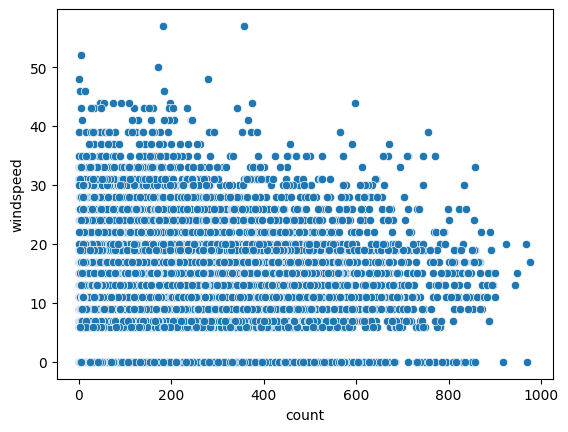

In [ ]:
sns.scatterplot(data=df,x='count',y='windspeed')

**Heatmap:**

<ipython-input-25-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

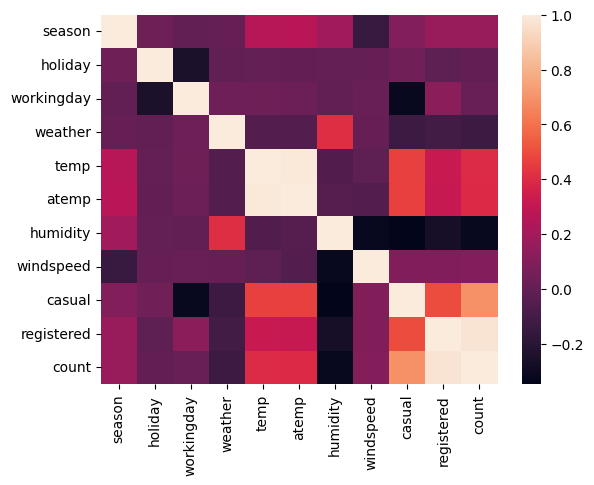

In [ ]:
sns.heatmap(df.corr())

# Hypothesis Testing

# **Chi square testing for dependency between season and weather:**

**Assumptions:**

Null hypothesis: no association between weather and season

Alternative hypothesis: both are associated

**Condfidence level:** 95, **alpha:** 0.05

In [ ]:
pd.crosstab(df['season'],df['weather'])

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
chi2_contingency(pd.crosstab(df['season'],df['weather']))

Chi2ContingencyResult(statistic=49.158655596893624, pvalue=1.549925073686492e-07, dof=9, expected_freq=array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

**Result:**

Null hypothesis is rejected since p-value is less than alpha, *there is statistically significant association between weather and season*

# 2-sample ttest between users in workingday and non-workingday:

**Assumptions:**

Null hypothesis: users in workingday and non-workingday are same

Alternative hypothesis: they are not same

**Condfidence level:** 95, **alpha:** 0.05

In [ ]:
work_users = df[df['workingday'] == 1]['count']
non_work_users = df[df['workingday'] == 0]['count']

In [ ]:
print('mean of users in workingday:',work_users.mean())
print('mean of users in non-workingday:',non_work_users.mean())

mean of users in workingday: 193.01187263896384
mean of users in non-workingday: 188.50662061024755


In [ ]:
ttest_ind(work_users,non_work_users)

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.22644804226361348)

**Result:**

Failed to reject null hypothesis since p-value is greater than alpha, there is no statistically significant difference between sample means of workingday and non-working days.

# Annova test between counts in weathers/seasons:

**Assumptions:**

Null hypothesis: users in different weathers and seasons are same

Alternative hypothesis: they are different

**Condfidence level:** 95, **alpha:** 0.05

In [ ]:
w1 = df[df['weather'] == 1]['count']
w2 = df[df['weather'] == 2]['count']
w3 = df[df['weather'] == 3]['count']
w4 = df[df['weather'] == 4]['count']

In [ ]:
f_oneway(w1,w2,w3,w4)

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

**Result:**

Null hypothesis is rejected since p-value is less than alpha, *there is statistically significant difference in users in different weathers*

In [ ]:
s1 = df[df['season'] == 1]['count']
s2 = df[df['season'] == 2]['count']
s3 = df[df['season'] == 3]['count']
s4 = df[df['season'] == 4]['count']

In [ ]:
f_oneway(s1,s2,s3,s4)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

**Result:**

Null hypothesis is rejected since p-value is less than alpha, *there is statistically significant difference in users in different seasons*